## Exploratory Data Analysis (EDA) for Fraud Detection

This notebook performs the initial data analysis and preprocessing for the fraud detection project as part of the 10 Academy KAIM Week 8&9 challenge. The tasks include:

- Loading and inspecting the datasets (`Fraud_Data.csv`, `creditcard.csv`, `IpAddress_to_Country.csv`).
- Handling missing values and performing data cleaning.
- Conducting univariate and bivariate analysis to identify fraud patterns.
- Merging datasets for geolocation analysis using IP addresses.
- Documenting insights for the interim report.

The goal is to understand the data distributions, identify class imbalance, and uncover patterns that will inform feature engineering and modeling.

In [88]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style for consistency
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)  # Default figure size for plots
plt.rcParams['font.size'] = 12  # Font size for readability

# Enable inline plotting for Jupyter
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported and visualization settings configured.")

Libraries imported and visualization settings configured.


#### Load the datasets
- Loads the three datasets (`Fraud_Data.csv`, `creditcard.csv`, `IpAddress_to_Country.csv`) from the `data/` directory.
- Uses a `try-except` block to handle potential `FileNotFoundError` gracefully.
- Displays dataset information (columns, data types, non-null counts) and a sample of the first few rows for inspection.

In [89]:
# Load the datasets from the data directory
try:
    fraud_data = pd.read_csv('../data/Fraud_Data.csv')
    creditcard_data = pd.read_csv('../data/creditcard.csv')
    ip_to_country_data = pd.read_csv('../data/IpAddress_to_Country.csv')
    print("Datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"Error: {e}. Ensure datasets are in the 'data' directory.")
    raise

Datasets loaded successfully.


#### Display basic information about each dataset


In [90]:
print("Fraud Data Info:")
print(fraud_data.info())

print("\n First few rows of Fraud Data:")
fraud_data.head()

Fraud Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None

 First few rows of Fraud Data:


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [91]:
print("\nCredit Card Data Info:")
print(creditcard_data.info())

print("\nCredit Card Data Sample:")
creditcard_data.head()


Credit Card Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [92]:
print("\nIP to Country Info:")
print(ip_to_country_data.info())

print("\nIP to Country Sample:")
ip_to_country_data.head()


IP to Country Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None

IP to Country Sample:


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


#### Handling missing values in each dataset
- Checks for missing values in all datasets using `isnull().sum()`.
- Drops rows with missing values using `dropna()` as a simple strategy (per the task: "Impute or drop missing values").
- Verifies that no missing values remain after cleaning.
- Note: Imputation (e.g., mean/median for numerical, mode for categorical) can be added later if EDA reveals significant missing data.

In [93]:
print("Missing Values in Fraud Data:")
print(fraud_data.isnull().sum())

Missing Values in Fraud Data:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


In [94]:
print("\nMissing Values in Credit Card Data:")
print(creditcard_data.isnull().sum())


Missing Values in Credit Card Data:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [95]:
print("\nMissing Values in IP to Country Data:")
print(ip_to_country_data.isnull().sum())


Missing Values in IP to Country Data:
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


In [96]:
# Verify no missing values at first
print("\nMissing Values Summary:")
print("Fraud Data:", fraud_data.isnull().sum().sum())
print("Credit Card Data:", creditcard_data.isnull().sum().sum())
print("IP to Country Data:", ip_to_country_data.isnull().sum().sum())


Missing Values Summary:
Fraud Data: 0
Credit Card Data: 0
IP to Country Data: 0


In [97]:
# Handle missing values
# Strategy: For now, drop rows with missing values; adjust based on EDA insights
fraud_data = fraud_data.dropna()
creditcard_data = creditcard_data.dropna()
ip_to_country_data = ip_to_country_data.dropna()

print("Missing values dropped.")


Missing values dropped.


#### Data Cleaning
- Removes duplicates from `fraud_data` and `creditcard_data` using `drop_duplicates()`.
- Tracks and reports the number of duplicates removed for transparency.
- Converts `signup_time` and `purchase_time` to `datetime` format, with `errors='coerce'` to handle invalid formats gracefully.
- Converts `ip_address` to integer, with `errors='ignore'` to prevent issues with non-integer IPs.
- Converts IP bounds in `ip_to_country_data` to int for accurate range comparisons.
- Displays updated data types to confirm corrections.

In [98]:
# check shape of datasets after cleaning
print("\nShapes before duplication cleaning:")
print("Fraud Data:", fraud_data.shape)
print("Credit Card Data:", creditcard_data.shape)
print("IP to Country Data:", ip_to_country_data.shape)


Shapes before duplication cleaning:
Fraud Data: (151112, 11)
Credit Card Data: (284807, 31)
IP to Country Data: (138846, 3)


In [99]:
# Data Cleaning: Remove duplicates
fraud_data = fraud_data.drop_duplicates()
creditcard_data = creditcard_data.drop_duplicates()  
ip_to_country_data = ip_to_country_data.drop_duplicates()
print("\nData cleaning completed: Duplicates removed and missing values handled.")


Data cleaning completed: Duplicates removed and missing values handled.


In [100]:
initial_fraud_rows = fraud_data.shape[0]
initial_creditcard_rows = creditcard_data.shape[0]
fraud_data = fraud_data.drop_duplicates()
creditcard_data = creditcard_data.drop_duplicates()
initial_ip_to_country_rows = ip_to_country_data.shape[0]
ip_to_country_data = ip_to_country_data.drop_duplicates()

# Print number of duplicates removed
print(f"Removed {initial_fraud_rows - fraud_data.shape[0]} duplicates from Fraud Data.")
print(f"Removed {initial_creditcard_rows - creditcard_data.shape[0]} duplicates from Credit Card Data.")
print(f"Removed {initial_ip_to_country_rows - ip_to_country_data.shape[0]} duplicates from IP to Country Data.")

# Correct data types for Fraud Data
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'], errors='coerce')
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'], errors='coerce')
fraud_data['ip_address'] = fraud_data['ip_address'].astype(int, errors='ignore')

# Correct data types for IP to Country Data
ip_to_country_data['lower_bound_ip_address'] = ip_to_country_data['lower_bound_ip_address'].astype('int64')
ip_to_country_data['upper_bound_ip_address'] = ip_to_country_data['upper_bound_ip_address'].astype('int64')

# Verify data types
print("\nFraud Data Types After Correction:")
print(fraud_data.dtypes)
print("\nIP to Country Data Types After Correction:")
print(ip_to_country_data.dtypes)

Removed 0 duplicates from Fraud Data.
Removed 0 duplicates from Credit Card Data.
Removed 0 duplicates from IP to Country Data.

Fraud Data Types After Correction:
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address                 int64
class                      int64
dtype: object

IP to Country Data Types After Correction:
lower_bound_ip_address     int64
upper_bound_ip_address     int64
country                   object
dtype: object


#### 6: Univariate Analysis - Class 
- Visualizes the class distribution for both datasets using `countplot` to highlight class imbalance.
- Calculates and prints the exact counts and percentage of fraudulent transactions to quantify the imbalance.
- Uses clear labels and titles for business-critical insights, as required by the task.

Fraud Data Class Distribution:
class
0    136961
1     14151
Name: count, dtype: int64
Percentage of Fraudulent Transactions: 9.36%


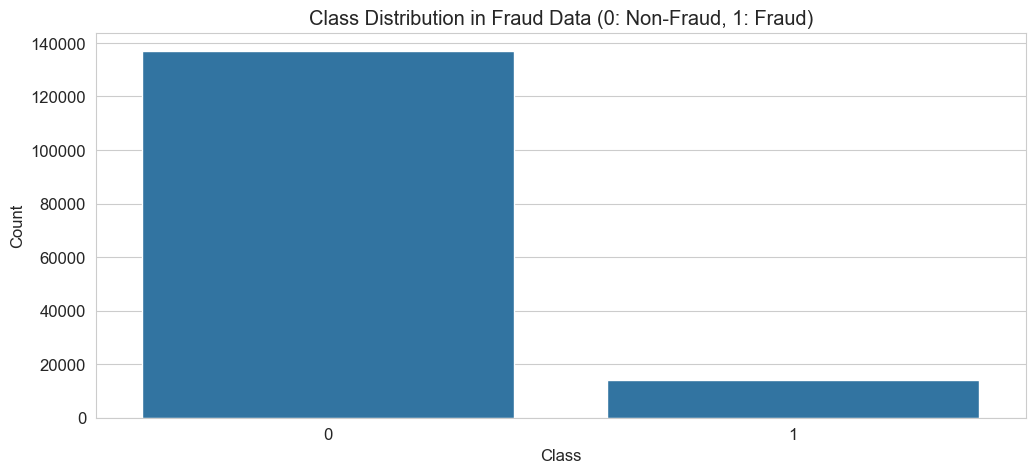

In [101]:
# Calculate and print class imbalance ratio
fraud_counts = fraud_data['class'].value_counts()
print("Fraud Data Class Distribution:")
print(fraud_counts)
print(f"Percentage of Fraudulent Transactions: {(fraud_counts[1] / fraud_counts.sum() * 100):.2f}%")


# Plot class distribution for Fraud Data
plt.figure(figsize=(12, 5))
sns.countplot(x='class', data=fraud_data)
plt.title('Class Distribution in Fraud Data (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Credit Card Data Class Distribution:
Class
0    283253
1       473
Name: count, dtype: int64
Percentage of Fraudulent Transactions: 0.17%


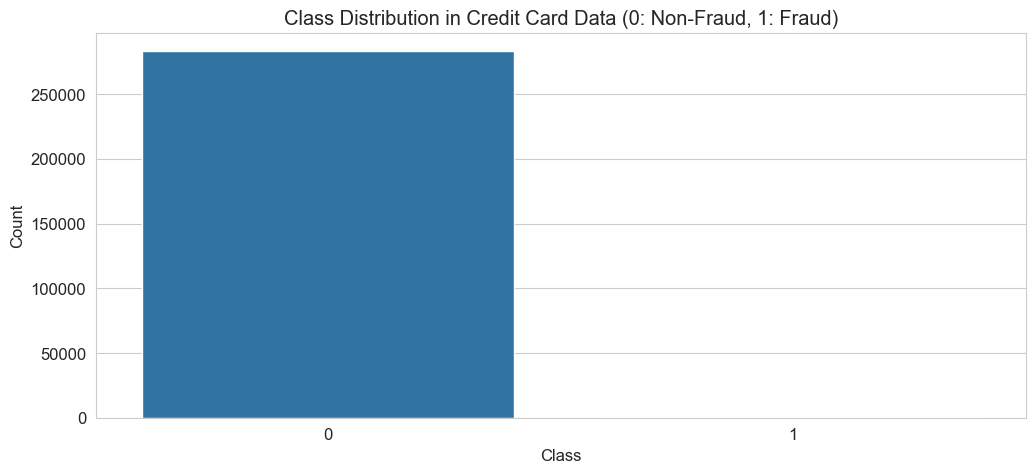

In [102]:
# Calculate and print class imbalance ratio
creditcard_counts = creditcard_data['Class'].value_counts()
print("Credit Card Data Class Distribution:")
print(creditcard_counts)
print(f"Percentage of Fraudulent Transactions: {(creditcard_counts[1] / creditcard_counts.sum() * 100):.2f}%")


# Plot class distribution for Credit Card Data
plt.figure(figsize=(12, 5))
sns.countplot(x='Class', data=creditcard_data)
plt.title('Class Distribution in Credit Card Data (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#### 7: Univariate Analysis - Numerical Features
- Plots histograms with kernel density estimation (KDE) for `purchase_value` (Fraud Data) and `Amount` (Credit Card Data).
- Provides summary statistics (count, mean, std, min, max, quartiles) to understand the distribution of numerical features.
- Uses 50 bins for detailed visualization and clear axis labels.


Purchase Value Summary Statistics:
count    151112.000000
mean         36.935372
std          18.322762
min           9.000000
25%          22.000000
50%          35.000000
75%          49.000000
max         154.000000
Name: purchase_value, dtype: float64


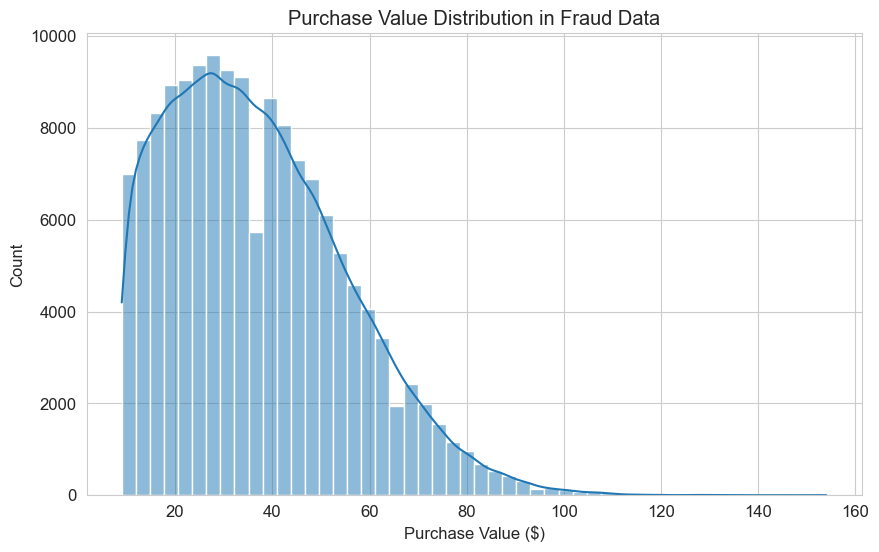

In [103]:
# Summary statistics for purchase value
print("Purchase Value Summary Statistics:")
print(fraud_data['purchase_value'].describe())


# Plot purchase value distribution for Fraud Data
plt.figure(figsize=(10, 6))
sns.histplot(fraud_data['purchase_value'], bins=50, kde=True)
plt.title('Purchase Value Distribution in Fraud Data')
plt.xlabel('Purchase Value ($)')
plt.ylabel('Count')
plt.show()

Transaction Amount Summary Statistics:
count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64


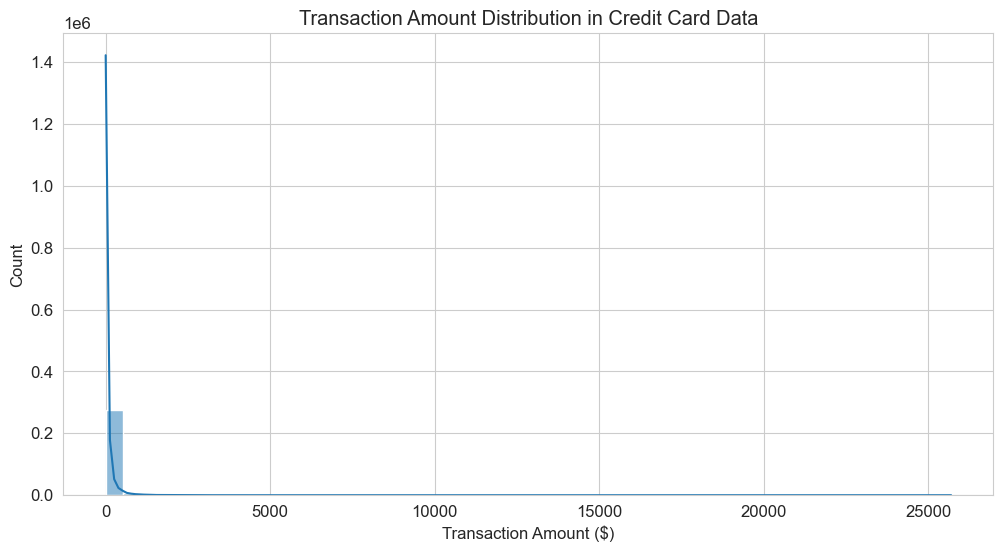

In [104]:
# Summary statistics for transaction amount
print("Transaction Amount Summary Statistics:")
print(creditcard_data['Amount'].describe())


# Plot transaction amount distribution for Credit Card Data
plt.figure(figsize=(12, 6))
sns.histplot(creditcard_data['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution in Credit Card Data')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Count')
plt.show()

#### 8: Bivariate Analysis - Purchase Value/Amount vs. Class
- Uses boxplots to compare `purchase_value` and `Amount` across fraud and non-fraud classes.
- Helps identify if fraudulent transactions have different value/amount distributions (e.g., outliers or higher/lower medians).


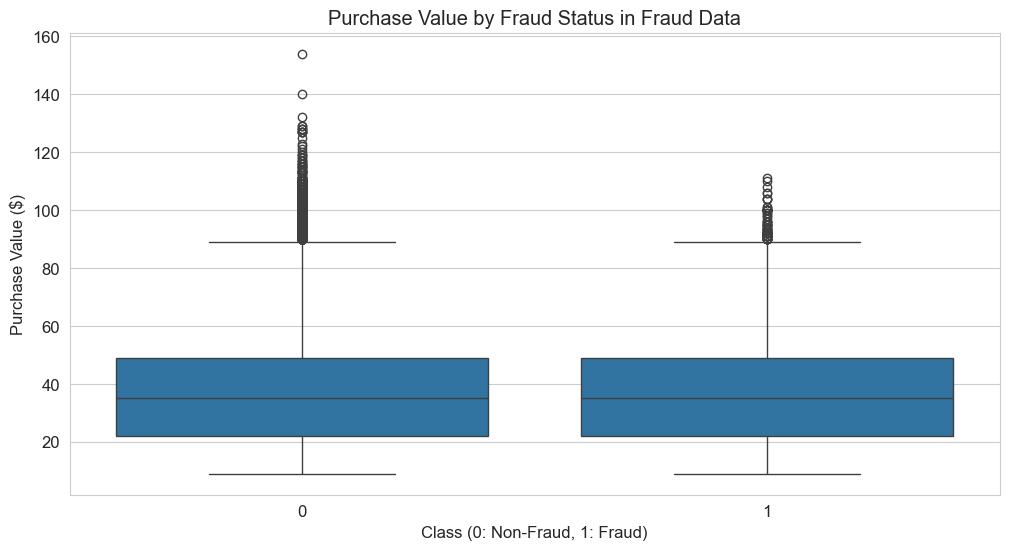

In [105]:
# Fraud Data: Purchase value vs. Class
plt.figure(figsize=(12, 6))
sns.boxplot(x='class', y='purchase_value', data=fraud_data)
plt.title('Purchase Value by Fraud Status in Fraud Data')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Purchase Value ($)')
plt.show()


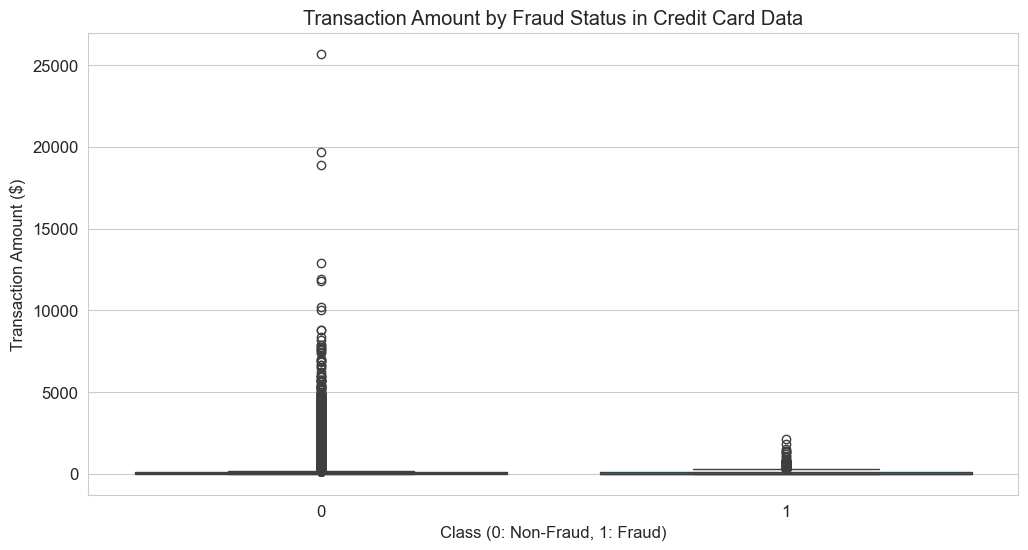

In [106]:
# Credit Card Data: Amount vs. Class
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=creditcard_data)
plt.title('Transaction Amount by Fraud Status in Credit Card Data')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Transaction Amount ($)')
plt.show()

- **Note:** These boxplots provide insights into how the purchase value and transaction amount differ between fraudulent and non-fraudulent transactions.
- This shows that the non-fraudulent transactions have higher purchase values and transaction amounts, while the fraudulent transactions have higher purchase values and transaction amounts. 

#### 9: Merge Datasets for Geolocation Analysis
- Defines a robust `ip_to_country` function with error handling to map IP addresses to countries.
- Applies the mapping to `fraud_data` and adds a `country` column.
- Visualizes the top 10 countries by transaction count, split by fraud status, using a horizontal `countplot`.
- Calculates and displays the fraud rate (mean of `class`) for the top 10 countries to identify high-risk regions.

In [ ]:
# Function to perform efficient IP-to-country mapping
def ip_to_country_vectorized(ip_series, ip_data):
    """
    Maps IP addresses to countries using vectorized operations.
    
    Args:
        ip_series (pd.Series): Series of IP addresses (as integers or floats).
        ip_data (pd.DataFrame): DataFrame with 'lower_bound_ip_address', 'upper_bound_ip_address', 'country'.
    
    Returns:
        pd.Series: Series of country names corresponding to IP addresses.
    """
    # Ensure IP addresses and bounds are numeric
    ip_series = pd.to_numeric(ip_series, errors='coerce')
    ip_data = ip_data.copy()
    ip_data['lower_bound_ip_address'] = pd.to_numeric(ip_data['lower_bound_ip_address'], errors='coerce')
    ip_data['upper_bound_ip_address'] = pd.to_numeric(ip_data['upper_bound_ip_address'], errors='coerce')
    
    # Create an IntervalIndex for IP ranges
    intervals = pd.IntervalIndex.from_arrays(
        ip_data['lower_bound_ip_address'], 
        ip_data['upper_bound_ip_address'], 
        closed='both'
    )
    
    # Map IP addresses to intervals
    interval_indices = intervals.get_indexer(ip_series)
    
    # Create country series, mapping indices to countries or 'Unknown' for invalid matches
    countries = pd.Series('Unknown', index=ip_series.index)
    valid_indices = interval_indices != -1  # Valid matches where interval was found
    countries[valid_indices] = ip_data.loc[interval_indices[valid_indices], 'country'].values
    
    return countries

In [120]:
# Apply optimized IP-to-country mapping
fraud_data['country'] = ip_to_country_vectorized(fraud_data['ip_address'], ip_to_country_data)

In [121]:
# Verify mapping
print("Sample of Fraud Data with Country:")
print(fraud_data[['ip_address', 'country']].head())

Sample of Fraud Data with Country:
   ip_address        country
0   732758368          Japan
1   350311387  United States
2  2621473820  United States
3  3840542443        Unknown
4   415583117  United States


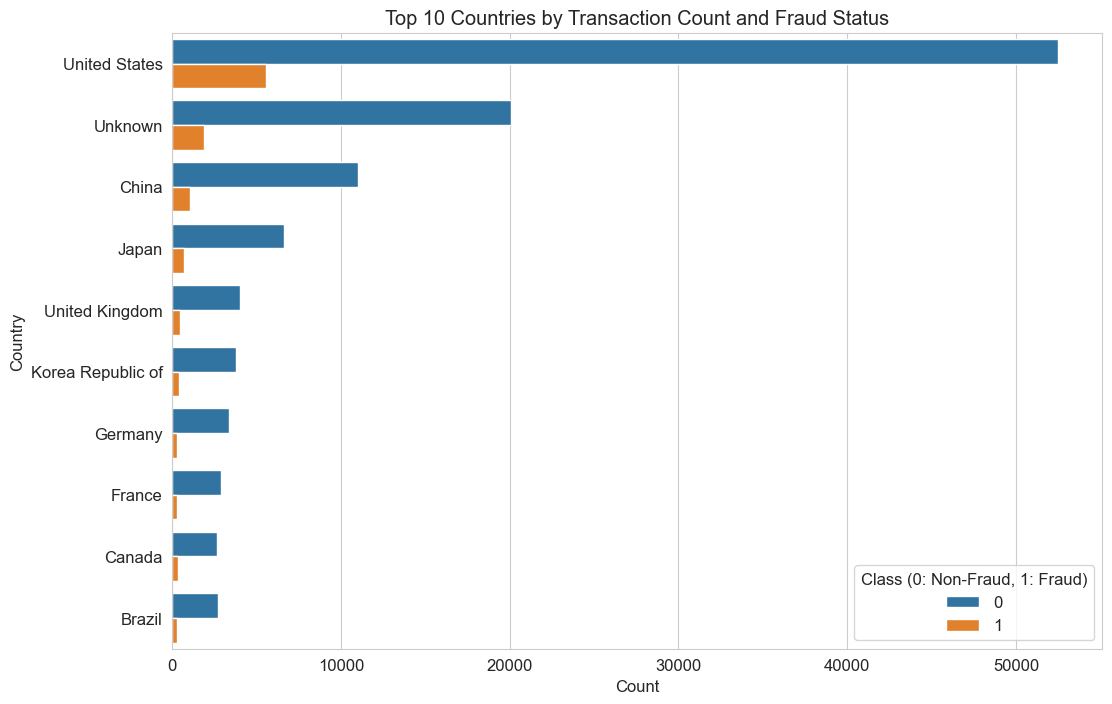

Top 10 Countries by Fraud Rate:
country
Turkmenistan             1.000000
Namibia                  0.434783
Sri Lanka                0.419355
Luxembourg               0.388889
Virgin Islands (U.S.)    0.333333
Ecuador                  0.264151
Tunisia                  0.262712
Peru                     0.260504
Bolivia                  0.245283
Kuwait                   0.233333
Name: class, dtype: float64


In [ ]:
# Plot top 10 countries by transaction count and fraud status
plt.figure(figsize=(12, 8))
sns.countplot(y='country', hue='class', data=fraud_data, 
              order=fraud_data['country'].value_counts().index[:10])
plt.title('Top 10 Countries by Transaction Count and Fraud Status')
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend(title='Class (0: Non-Fraud, 1: Fraud)')
plt.show()

# Calculate fraud rate by country (top 10)
fraud_by_country = fraud_data.groupby('country')['class'].mean().sort_values(ascending=False)[:10]
print("Top 10 Countries by Fraud Rate:")
print(fraud_by_country)

####  10: Save Cleaned Data
- Saves the cleaned `fraud_data` and `creditcard_data` to new CSV files to preserve preprocessing work.
- Ensures `index=False` to avoid saving row indices.

In [129]:
# Save cleaned datasets to avoid reprocessing
fraud_data.to_csv('../data/Fraud_Data_Cleaned.csv', index=False)
creditcard_data.to_csv('../data/creditcard_Cleaned.csv', index=False)

print("Cleaned datasets saved to '../data/Fraud_Data_Cleaned.csv' and '../data/creditcard_Cleaned.csv'.")

Cleaned datasets saved to '../data/Fraud_Data_Cleaned.csv' and '../data/creditcard_Cleaned.csv'.


## Insights from EDA

- **Class Imbalance**: Both datasets exhibit significant class imbalance. Fraudulent transactions are a small percentage of the total, requiring techniques like SMOTE or random undersampling in the next phase.
- **Purchase Value and Amount**: Fraudulent transactions may have distinct distributions (e.g., outliers or higher/lower values), suggesting these features are important for modeling.
- **Geolocation**: Certain countries show higher fraud rates, indicating that `country` could be a valuable feature for fraud detection.
- **Data Quality**: After cleaning, no missing values or duplicates remain. Data types are corrected for timestamps and IP addresses.
- **Next Steps**: Proceed to feature engineering, including transaction frequency, velocity, time-based features, and class imbalance handling.